In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

In [2]:
dataset = pd.read_csv(
    './data/ConfLongDemo_JSI.csv',
    sep=',',
    names=["seq", "tag", "timestamp", "date", "x", "y", "z", "activity"])

In [3]:
# Encoding seq
dataset['seq'] = dataset['seq'].astype('category')
dataset['seq'] = dataset['seq'].cat.codes
# Encoding activity
dataset['activity'] = dataset['activity'].astype('category')
dataset['activity'] = dataset['activity'].cat.codes
# Encoding tag
dataset['tag'] = dataset['tag'].astype('category')
dataset['tag'] = dataset['tag'].cat.codes
# del dataset['timestamp']
#normalizing timestamp
dataset['timestamp'] = (dataset['timestamp'] -
                  dataset['timestamp'].mean()) / dataset['timestamp'].std()

# normalizing seq
dataset['seq'] = (dataset['seq'] -
                  dataset['seq'].mean()) / dataset['seq'].std()
# normalizing tag
dataset['tag'] = (dataset['tag'] -
                  dataset['tag'].mean()) / dataset['tag'].std()
# normalizing x
dataset['x'] = (dataset['x'] - dataset['x'].mean()) / dataset['x'].std()
# normalizing y
dataset['y'] = (dataset['y'] - dataset['y'].mean()) / dataset['y'].std()
# normalizing z
dataset['z'] = (dataset['z'] - dataset['z'].mean()) / dataset['z'].std()

print(dataset)

             seq       tag  timestamp                     date         x  \
0      -1.774225 -1.302171   0.525583  27.05.2009 14:03:25:127  1.366019   
1      -1.774225  1.427813   0.525593  27.05.2009 14:03:25:183  1.615982   
2      -1.774225  0.517818   0.525598  27.05.2009 14:03:25:210  1.689269   
3      -1.774225 -1.302171   0.525602  27.05.2009 14:03:25:237  1.393201   
4      -1.774225 -0.392177   0.525607  27.05.2009 14:03:25:263  1.651463   
...          ...       ...        ...                      ...       ...   
164855  1.501425 -0.392177  -0.917507  27.05.2009 11:50:41:957  0.434528   
164856  1.501425 -1.302171  -0.917503  27.05.2009 11:50:41:983  0.628153   
164857  1.501425  1.427813  -0.917498  27.05.2009 11:50:42:010  0.412067   
164858  1.501425 -0.392177  -0.917488  27.05.2009 11:50:42:063  0.369800   
164859  1.501425 -1.302171  -0.917483  27.05.2009 11:50:42:090  0.435095   

               y         z  activity  
0       0.412769  0.235318        10  
1       0

In [4]:
s = dataset['date']
print(s,type(s))
s = s.tolist()
# this proves that date is same. only time differs
print(len(s))
r = ''
for i in range(len(s)):
    r = (s[i].split())[1]
    r = r.split(':')
    t = r[0]+r[1]+r[2]+r[3]
    s[i] = int(t)
del dataset['date']
dataset['date'] = s
dataset['date'] = (dataset['date'] - dataset['date'].mean()) / dataset['date'].std()

0         27.05.2009 14:03:25:127
1         27.05.2009 14:03:25:183
2         27.05.2009 14:03:25:210
3         27.05.2009 14:03:25:237
4         27.05.2009 14:03:25:263
                   ...           
164855    27.05.2009 11:50:41:957
164856    27.05.2009 11:50:41:983
164857    27.05.2009 11:50:42:010
164858    27.05.2009 11:50:42:063
164859    27.05.2009 11:50:42:090
Name: date, Length: 164860, dtype: object <class 'pandas.core.series.Series'>
164860


In [5]:
print(dataset)
target = dataset['activity']
del dataset['activity']

             seq       tag  timestamp         x         y         z  activity  \
0      -1.774225 -1.302171   0.525583  1.366019  0.412769  0.235318        10   
1      -1.774225  1.427813   0.525593  1.615982  0.177858  2.443221        10   
2      -1.774225  0.517818   0.525598  1.689269  0.273506  1.452321        10   
3      -1.774225 -1.302171   0.525602  1.393201  0.386521  0.128646        10   
4      -1.774225 -0.392177   0.525607  1.651463  0.792755  0.184251        10   
...          ...       ...        ...       ...       ...       ...       ...   
164855  1.501425 -0.392177  -0.917507  0.434528  0.733890 -0.937181        10   
164856  1.501425 -1.302171  -0.917503  0.628153  0.649793 -0.060796        10   
164857  1.501425  1.427813  -0.917498  0.412067  0.461913  2.465883        10   
164858  1.501425 -0.392177  -0.917488  0.369800  0.494516 -0.957927        10   
164859  1.501425 -1.302171  -0.917483  0.435095  0.512274 -0.140938        10   

            date  
0       

In [6]:
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.25, random_state=0)

In [7]:
clf = LogisticRegression(penalty='l2', solver='saga',multi_class='multinomial')

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
target_names = []
for i in range(11):
    target_names.append(str(i))

In [ ]:
score = clf.score(x_test,y_test)
print(score)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

In [ ]:
clf = LogisticRegression(penalty='l2', solver='liblinear',multi_class='ovr')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

In [ ]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",multi_class="ovr")
y = label_binarize(y_train,classes=range(11))
y_t = label_binarize(y_test,classes=range(11))
out = OneVsRestClassifier(logreg).fit(x_train,y_train).decision_function(x_test)


# In[30]:


fpr= dict()
tpr = dict()
roc_auc = dict()
for i in range(11):
    fpr[i],tpr[i],t = roc_curve(y_t[:,i],out[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen","orange"]
for i,c in zip(range(11),col):
    plt.plot(fpr[i],tpr[i],color=c,lw=2,label=("ROC curve of class "+str(i)))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('For L2 regularization')
plt.legend(loc="lower right")
plt.show()



In [ ]:
clf = LogisticRegression(penalty='l2', solver='newton-cg',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)
X_train = x_train

In [ ]:
clf = LogisticRegression(penalty='l2', solver='lbfgs',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

In [ ]:
# Now decision tree
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=100)
decision_tree = decision_tree.fit(x_train, y_train)

In [ ]:
r = export_text(decision_tree)
print(r)

In [ ]:
print(decision_tree.score(x_test, y_test))


y_pred = clf.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred,target_names=target_names))
print("\n", c_matrix)

In [ ]:
# Now random forest
clf = RandomForestClassifier(n_estimators=100, max_depth=100,random_state=0)
clf.fit(x_train, y_train)

In [ ]:
print(clf.feature_importances_)

In [ ]:
print(clf.score(x_test, y_test))

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

In [ ]:
# Now SVM
clf = SVC(C=0.1, gamma='scale', kernel='rbf')
clf.fit(x_train, y_train) 

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', kernel='linear')
clf.fit(x_train, y_train)

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', degree=2, kernel='poly')
clf.fit(x_train, y_train)

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', degree=3, kernel='poly')
clf.fit(x_train, y_train)

In [ ]:
print(clf.score(x_test, y_test))

In [ ]:
clf = SVC(C=0.1, gamma='scale', kernel='sigmoid')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

In [ ]:
for k in range(1,30):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    score = metrics.accuracy_score(y_test,y_pred)
    print(k,score)

In [ ]:
reg1 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), solver='sgd',learning_rate='constant', learning_rate_init=0.1, batch_size=128,verbose=True)
reg1.fit(x_train, y_train)
t = reg1.score(x_train,y_train)
tt = reg1.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [ ]:
reg2 = MLPClassifier(hidden_layer_sizes=(256, 128, 64),verbose=True)
reg2.fit(x_train, y_train)
t = reg2.score(x_train,y_train)
tt = reg2.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [ ]:
reg3 = MLPClassifier(hidden_layer_sizes=(256, 128 , 64, 32),verbose=True, max_iter=500)
reg3.fit(x_train, y_train)
t = reg3.score(x_train,y_train)
tt = reg3.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [ ]:
reg3 = MLPClassifier(hidden_layer_sizes=(256, 128 , 64, 32,16),verbose=True, max_iter=500)
reg3.fit(x_train, y_train)
t = reg3.score(x_train,y_train)
tt = reg3.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [ ]:
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [13]:
import seaborn as sns; 
sns.set()
ax = sns.heatmap(X_train)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
train = pd.read_csv('./data/ConfLongDemo_JSI.csv')


train.columns=['Sequence Name','tagID','Time stamp','Date','x coordinate','y coordinate','z coordinate','activity']
# print(train.head())
# process columns, apply object > numeric
# process columns, apply LabelEncoder to categorical features
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
print(train.head())

   Sequence Name  tagID          Time stamp    Date  x coordinate  \
0              0      3  633790226051820913  105776      4.291954   
1              0      2  633790226052091205  105777      4.359101   
2              0      0  633790226052361498  105778      4.087835   
3              0      1  633790226052631792  105779      4.324462   
4              0      3  633790226052902087  105780      4.364077   

   y coordinate  z coordinate  activity  
0      1.781140      1.344495        10  
1      1.826456      0.968821        10  
2      1.879999      0.466983        10  
3      2.072460      0.488065        10  
4      1.767691      1.299996        10  


In [2]:
new_col= train.groupby('activity').mean()
print(new_col.head().T)
train=train.fillna(0)
# Scatterplot Matrix
# Variables chosen from Random Forest modeling.
cols = ['x coordinate','y coordinate','z coordinate','activity']

# sns.pairplot(train[cols],
#              x_vars = cols,
#              y_vars = cols,
#              hue = 'activity', 
#              )

activity                  0             1             2             3  \
Sequence Name  1.391826e+01  1.241327e+01  1.343142e+01  1.151977e+01   
tagID          1.412714e+00  1.432397e+00  1.402237e+00  1.447217e+00   
Time stamp     6.337902e+17  6.337902e+17  6.337902e+17  6.337902e+17   
Date           7.650148e+04  8.497568e+04  8.109940e+04  9.009761e+04   
x coordinate   3.417612e+00  2.859681e+00  2.038875e+00  1.897031e+00   
y coordinate   1.343692e+00  1.806732e+00  1.984010e+00  1.526687e+00   
z coordinate   4.791489e-01  3.169376e-01  3.938247e-01  1.146068e-01   

activity                  4  
Sequence Name  1.270658e+01  
tagID          1.438298e+00  
Time stamp     6.337902e+17  
Date           8.333538e+04  
x coordinate   2.856567e+00  
y coordinate   1.561189e+00  
z coordinate   5.306721e-01  


KNN %error 0.5 rmsle 0.0817690524666455
KNN Confusion Matrix


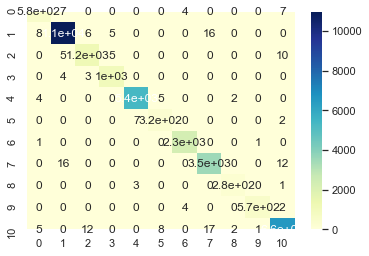

--------------------------------------------------------------------------------
KNN Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       596
           1       1.00      1.00      1.00     10998
           2       0.98      0.98      0.98      1240
           3       0.99      0.99      0.99      1053
           4       1.00      1.00      1.00      5402
           5       0.96      0.97      0.97       334
           6       1.00      1.00      1.00      2275
           7       0.99      0.99      0.99      3575
           8       0.99      0.99      0.99       284
           9       1.00      0.99      0.99       578
          10       0.99      0.99      0.99      6637

    accuracy                           0.99     32972
   macro avg       0.99      0.99      0.99     32972
weighted avg       0.99      0.99      0.99     32972

--------------------------------------------------------------------------------

In [16]:
from sklearn.linear_model import OrthogonalMatchingPursuit,RANSACRegressor,LogisticRegression,ElasticNetCV,HuberRegressor, Ridge, Lasso,LassoCV,Lars,BayesianRidge,SGDClassifier,LogisticRegressionCV,RidgeClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)


from sklearn.linear_model import OrthogonalMatchingPursuit,RANSACRegressor,LogisticRegression,ElasticNetCV,HuberRegressor, Ridge, Lasso,LassoCV,Lars,BayesianRidge,SGDClassifier,LogisticRegressionCV,RidgeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import graphviz 
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import DistanceMetric
from scipy import stats

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

n_col=36
X = train.drop(['activity'],axis=1)
X = X.drop(['Time stamp'], axis=1)
# X = X.drop(['Date'], axis=1)
Y=train['activity']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#X=X.fillna(value=0)
#scaler = MinMaxScaler()
#scaler.fit(X)
#X=scaler.transform(X)
#poly = PolynomialFeatures(2)
#X=poly.fit_transform(X)


names = [
#          'DecisionTree',
#          'RandomForestClassifier',    
         #'ElasticNet',
         #'SVC',
         #'kSVC',
         'KNN',
         #'GridSearchCV',
#          'HuberRegressor',
#          'Ridge',
#          'Lasso',
#          'LassoCV',
#          'Lars',
#          'BayesianRidge',
#          'SGDClassifier',
#          'RidgeClassifier',
#          'LogisticRegression',
#          'OrthogonalMatchingPursuit',
         #'RANSACRegressor',
         ]

classifiers = [
#     DecisionTreeClassifier(),
#     RandomForestClassifier(n_estimators = 200),
    #ElasticNetCV(cv=10, random_state=0),
    #SVC(),
    #SVC(kernel = 'rbf', random_state = 0),
    KNeighborsClassifier(n_neighbors = 5),
    #GridSearchCV(SVC(),param_grid, refit = True, verbose = 1),
    HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,epsilon=2.95),
    Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True),
    Lasso(alpha=0.05),
    LassoCV(),
    Lars(n_nonzero_coefs=10),
    BayesianRidge(),
    SGDClassifier(),
    RidgeClassifier(),
    LogisticRegression(),
    OrthogonalMatchingPursuit(),
    #RANSACRegressor(),
]
correction= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

models=zip(names,classifiers,correction)
   
for name, clf,correct in models:
    regr=clf.fit(X_train,y_train)
    #print( name,'% errors', abs(regr.predict(X)+correct-Y).sum()/(Y.sum())*100)
    print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
    
    # Confusion Matrix
    print(name,'Confusion Matrix')
    conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
    label=np.sort( y_test.unique() )
    sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
    plt.show()
    
    print('--'*40)

    # Classification Report
    print(name,'Classification Report')
    classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
    print(classif)


    # Accuracy
    print('--'*40)
    logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
    print('Accuracy', logreg_accuracy,'%')
    
#     if name=='DecisionTree':
#         label=train.columns
#         label=label[:-1].values
#         important=pd.DataFrame(clf.feature_importances_,index=label,columns=['imp'])
#         important.sort_values(by='imp').plot(kind='bar')
#         plt.show()


In [13]:
import seaborn as sns; sns.set()

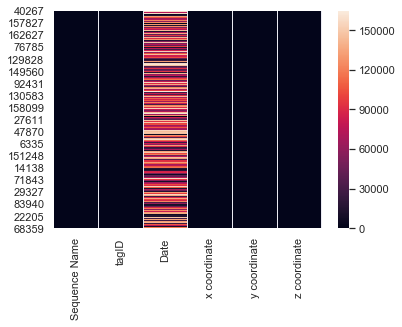

In [17]:
ax = sns.heatmap(X_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


Lasso %error 64.6 rmsle 0.716190262571647
Lasso Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   12  173  309   96    6    0    0    0]
 [   1    2    7   55  704 5896 3994  308   21    9    1    0]
 [   0    0    1    3   31  547  542   94   10   10    2    0]
 [   1    0    3    5  114  623  262   29   10    5    1    0]
 [   0    0    0    1   95 1222 3193  871   12    8    0    0]
 [   0    0    0    0    9  105  188   26    3    2    1    0]
 [   0    0    0    0   27  870 1363   14    1    0    0    0]
 [   0    0    3    4  105 1683 1519  206   22   20   13    0]
 [   0    0    0    0    6   94  160   22    1    1    0    0]
 [   1    0    0    0   21  329  210   17    0    0    0    0]
 [   0    0    0    6  118 1814 2750 1768  147   30    4    0]]


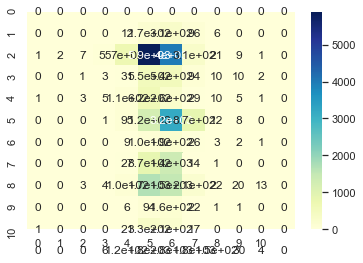

--------------------------------------------------------------------------------
Lasso Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       596
         1.0       0.50      0.00      0.00     10998
         2.0       0.04      0.00      0.00      1240
         3.0       0.09      0.11      0.10      1053
         4.0       0.09      0.23      0.13      5402
         5.0       0.01      0.56      0.03       334
         6.0       0.00      0.01      0.00      2275
         7.0       0.09      0.01      0.01      3575
         8.0       0.01      0.00      0.01       284
         9.0       0.00      0.00      0.00       578
        10.0       0.00      0.00      0.00      6637

    accuracy                           0.05     32972
   macro avg       0.07      0.08      0.02     32972
weighted avg       0.20      0.05      0.03     32972

------------------------

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
# Lasso
correct = 0
clf = Lasso(alpha=0.05)
regr=clf.fit(X_train,y_train)

print("Lasso",'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print("Lasso",'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) )
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print("Lasso",'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV %error 66.7 rmsle 0.7386866000543737
LassoCV Confusion Matrix
[[   0    0    0    0  150  446    0    0    0    0    0]
 [   0    0    0    0 3434 7564    0    0    0    0    0]
 [   0    0    0    0  373  867    0    0    0    0    0]
 [   0    0    0    0  358  695    0    0    0    0    0]
 [   0    0    0    0 1700 3702    0    0    0    0    0]
 [   0    0    0    0  101  233    0    0    0    0    0]
 [   0    0    0    0  748 1527    0    0    0    0    0]
 [   0    0    0    0 1067 2508    0    0    0    0    0]
 [   0    0    0    0   79  205    0    0    0    0    0]
 [   0    0    0    0  185  393    0    0    0    0    0]
 [   0    0    0    0 1825 4812    0    0    0    0    0]]


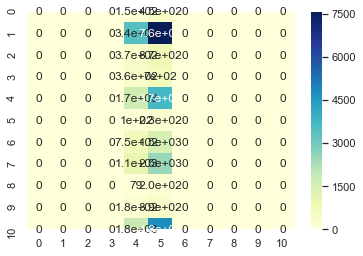

--------------------------------------------------------------------------------
LassoCV Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.00      0.00      0.00     10998
           2       0.00      0.00      0.00      1240
           3       0.00      0.00      0.00      1053
           4       0.17      0.31      0.22      5402
           5       0.01      0.70      0.02       334
           6       0.00      0.00      0.00      2275
           7       0.00      0.00      0.00      3575
           8       0.00      0.00      0.00       284
           9       0.00      0.00      0.00       578
          10       0.00      0.00      0.00      6637

    accuracy                           0.06     32972
   macro avg       0.02      0.09      0.02     32972
weighted avg       0.03      0.06      0.04     32972

----------------------------------------------------------------------------

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
# LassoCV
name = "LassoCV"
clf = LassoCV()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


Lars %error 64.2 rmsle 0.7117869059238155
Lars Confusion Matrix


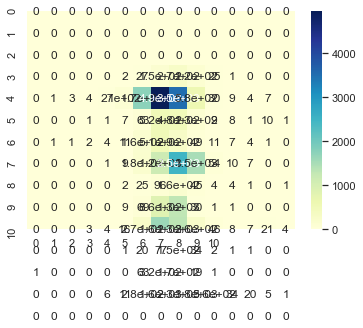

--------------------------------------------------------------------------------
Lars Classification Report
              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       596
         1.0       0.63      0.00      0.00     10998
         2.0       0.04      0.01      0.01      1240
         3.0       0.06      0.15      0.08      1053
         4.0       0.10      0.21      0.13      5402
         5.0       0.01      0.47      0.02       334
         6.0       0.01      0.01      0.01      2275
         7.0       0.06      0.01      0.02      3575
         8.0       0.01      0.00      0.01       284
         9.0       0.00      0.00      0.00       578
        10.0       0.11      0.00      0.00      6637
        11.0       0.00      0.00      0.00         0

    accuracy              

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [21]:
# Lars

clf = Lars(n_nonzero_coefs=10)
correct = 0
regr=clf.fit(X_train,y_train)

print("Lars",'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print("Lars",'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print("Lars",'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


BayesianRidge %error 64.2 rmsle 0.7117897445432942
BayesianRidge Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    2   27  146  273  122   25    1    0    0
     0]
 [   0    1    3    4   27  100 1748 4947 3535  583   30    9    4    7
     0]
 [   0    0    0    1    1    7   62  522  485  133    9    8    1   11
     0]
 [   0    1    1    2    4   11  163  510  290   48   11    7    4    1
     0]
 [   0    0    0    0    1    9  183 1152 2486 1500   54   10    7    0
     0]
 [   0    0    0    0    0    2   25   96  156   45    4    4    1    0
     1]
 [   0    0    0    0    0    9   69  858 1307   30    1    1    0    0
     0]
 [   0    0    0    3    4   16  267 1617 1327  255   46    8    7   21
     4]
 [   0    0    0    0    0    1   20  

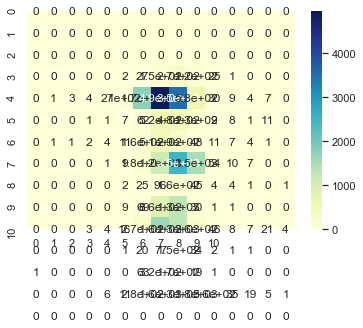

--------------------------------------------------------------------------------
BayesianRidge Classification Report
              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       596
         1.0       0.63      0.00      0.00     10998
         2.0       0.04      0.01      0.01      1240
         3.0       0.06      0.15      0.08      1053
         4.0       0.10      0.21      0.13      5402
         5.0       0.01      0.47      0.02       334
         6.0       0.01      0.01      0.01      2275
         7.0       0.06      0.01      0.02      3575
         8.0       0.01      0.00      0.01       284
         9.0       0.00      0.00      0.00       578
        10.0       0.11      0.00      0.00      6637
        11.0       0.00      0.00      0.00         0

    accuracy     

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [22]:
# LassoCV
name = "BayesianRidge"
clf = BayesianRidge()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

SGDClassifier %error 72.6 rmsle 0.8086330080137456
SGDClassifier Confusion Matrix
[[    0     0   596     0     0     0     0     0     0     0     0]
 [    0     0 10998     0     0     0     0     0     0     0     0]
 [    0     0  1240     0     0     0     0     0     0     0     0]
 [    0     0  1053     0     0     0     0     0     0     0     0]
 [    0     0  5330     0     0     0     0     0     0     0    72]
 [    0     0   320     0     0     0     0     0     0     0    14]
 [    0     0  2275     0     0     0     0     0     0     0     0]
 [    0     0  3575     0     0     0     0     0     0     0     0]
 [    0     0   284     0     0     0     0     0     0     0     0]
 [    0     0   578     0     0     0     0     0     0     0     0]
 [    0     0  6574     0     0     0     0     0     0     0    63]]


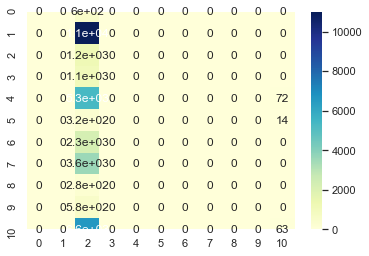

--------------------------------------------------------------------------------
SGDClassifier Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.00      0.00      0.00     10998
           2       0.04      1.00      0.07      1240
           3       0.00      0.00      0.00      1053
           4       0.00      0.00      0.00      5402
           5       0.00      0.00      0.00       334
           6       0.00      0.00      0.00      2275
           7       0.00      0.00      0.00      3575
           8       0.00      0.00      0.00       284
           9       0.00      0.00      0.00       578
          10       0.42      0.01      0.02      6637

    accuracy                           0.04     32972
   macro avg       0.04      0.09      0.01     32972
weighted avg       0.09      0.04      0.01     32972

----------------------------------------------------------------------

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# SGDClassifier
name = "SGDClassifier"
clf = SGDClassifier()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

RidgeClassifier %error 71.0 rmsle 0.9589928712856054
RidgeClassifier Confusion Matrix
[[   0  351    0    0   59    0    0    0    0    0  186]
 [   0 9542    0    1  462    0    8    0    0    0  985]
 [   0  951    0    0   10    0    0    0    0    0  279]
 [   0  824    0    1   57    0    0    0    0    0  171]
 [   0 2635    0    0  618    0    0    0    0    0 2149]
 [   0  231    0    0   15    0    0    0    0    0   88]
 [   0 2037    0    0  132    0    0    0    0    0  106]
 [   0 2892    0    1  110    0    2    0    0    0  570]
 [   0  202    0    0    9    0    0    0    0    0   73]
 [   0  546    0    0    7    0    0    0    0    0   25]
 [   0 3367    0    0  105    0    0    0    0    0 3165]]


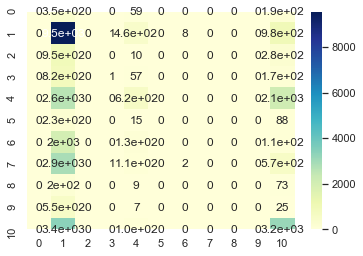

--------------------------------------------------------------------------------
RidgeClassifier Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.40      0.87      0.55     10998
           2       0.00      0.00      0.00      1240
           3       0.33      0.00      0.00      1053
           4       0.39      0.11      0.18      5402
           5       0.00      0.00      0.00       334
           6       0.00      0.00      0.00      2275
           7       0.00      0.00      0.00      3575
           8       0.00      0.00      0.00       284
           9       0.00      0.00      0.00       578
          10       0.41      0.48      0.44      6637

    accuracy                           0.40     32972
   macro avg       0.14      0.13      0.11     32972
weighted avg       0.29      0.40      0.30     32972

--------------------------------------------------------------------

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
# RidgeClassifier
name = "RidgeClassifier"
clf = RidgeClassifier()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression %error 79.2 rmsle 1.0707629041698312
LogisticRegression Confusion Matrix
[[    0   596     0     0     0     0     0     0     0     0     0]
 [    0 10998     0     0     0     0     0     0     0     0     0]
 [    0  1240     0     0     0     0     0     0     0     0     0]
 [    0  1053     0     0     0     0     0     0     0     0     0]
 [    0  5402     0     0     0     0     0     0     0     0     0]
 [    0   334     0     0     0     0     0     0     0     0     0]
 [    0  2275     0     0     0     0     0     0     0     0     0]
 [    0  3575     0     0     0     0     0     0     0     0     0]
 [    0   284     0     0     0     0     0     0     0     0     0]
 [    0   578     0     0     0     0     0     0     0     0     0]
 [    0  6637     0     0     0     0     0     0     0     0     0]]


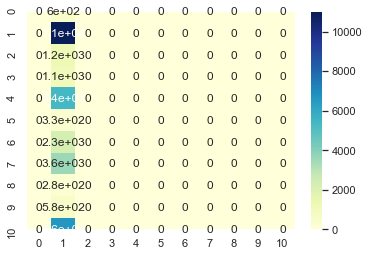

--------------------------------------------------------------------------------
LogisticRegression Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.33      1.00      0.50     10998
           2       0.00      0.00      0.00      1240
           3       0.00      0.00      0.00      1053
           4       0.00      0.00      0.00      5402
           5       0.00      0.00      0.00       334
           6       0.00      0.00      0.00      2275
           7       0.00      0.00      0.00      3575
           8       0.00      0.00      0.00       284
           9       0.00      0.00      0.00       578
          10       0.00      0.00      0.00      6637

    accuracy                           0.33     32972
   macro avg       0.03      0.09      0.05     32972
weighted avg       0.11      0.33      0.17     32972

-----------------------------------------------------------------

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
# LogisticRegression
name = "LogisticRegression"
clf = LogisticRegression()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

OrthogonalMatchingPursuit %error 65.2 rmsle 0.7259558746346771
OrthogonalMatchingPursuit Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1   11  257  225   98    4    0    0    0]
 [   0    2    2   13  228 5734 4798  188   29    3    1    0]
 [   0    0    0    2   31  571  526   86   18    6    0    0]
 [   0    1    0    3  141  704  176   21    6    1    0    0]
 [   0    0    0    1   90 1588 2669 1035   18    1    0    0]
 [   0    0    0    0   14  134  130   49    6    1    0    0]
 [   0    0    0    1   36  771 1443   23    1    0    0    0]
 [   0    0    1    4   79 1857 1371  213   28   21    1    0]
 [   0    0    0    0    7  129  110   36    2    0    0    0]
 [   1    0    0    0   20  273  254   29    1    0    0    0]
 [   0    0    0    3  166 2719 1519 2038  162    9   21    0]]


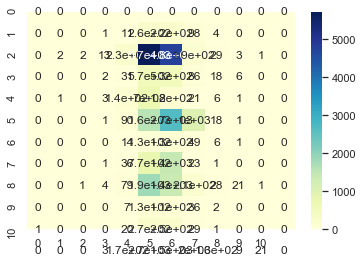

--------------------------------------------------------------------------------
OrthogonalMatchingPursuit Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00       596
         1.0       0.67      0.00      0.00     10998
         2.0       0.07      0.00      0.00      1240
         3.0       0.17      0.13      0.15      1053
         4.0       0.11      0.29      0.16      5402
         5.0       0.01      0.39      0.02       334
         6.0       0.01      0.01      0.01      2275
         7.0       0.10      0.01      0.01      3575
         8.0       0.00      0.00      0.00       284
         9.0       0.00      0.00      0.00       578
        10.0       0.00      0.00      0.00      6637

    accuracy                           0.06     32972
   macro avg       0.09      0.07      0.03     32972
weighted avg       0.26      0.06      0.03     32972

----

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
# OrthogonalMatchingPursuit
name = "OrthogonalMatchingPursuit"
clf = OrthogonalMatchingPursuit()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


RANSACRegressor() %error 70.1 rmsle 0.9684869806850791
RANSACRegressor() Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    0    1    6   27   75  195  211   66   12    2    0
     1    0    0    0    0    0    0]
 [   0    2    1    5   84  415 1613 3914 2871 1400  475  142   46   18
     1    2    7    1    1    0    0]
 [   1    0    1    0    4   1

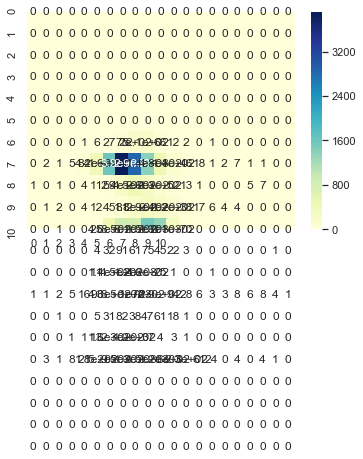

--------------------------------------------------------------------------------
RANSACRegressor() Classification Report
              precision    recall  f1-score   support

        -6.0       0.00      0.00      0.00         0
        -5.0       0.00      0.00      0.00         0
        -4.0       0.00      0.00      0.00         0
        -3.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.01      0.05      0.01       596
         1.0       0.50      0.36      0.42     10998
         2.0       0.05      0.36      0.10      1240
         3.0       0.04      0.28      0.08      1053
         4.0       0.34      0.25      0.29      5402
         5.0       0.02      0.07      0.03       334
         6.0       0.00      0.00      0.00      2275
         7.0       0.06      0.00      0.00      3575
         8.0       0.00      0.00      0.00       284
         9.0  

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [27]:
# RANSACRegressor()
name = "RANSACRegressor()"
clf = RANSACRegressor()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
label=np.sort( y_test.unique() )
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')